[[1.   0.95 0.9  0.85 0.8 ]
 [0.95 1.   0.95 0.9  0.85]
 [0.9  0.95 1.   0.95 0.9 ]
 [0.85 0.9  0.95 1.   0.95]
 [0.8  0.85 0.9  0.95 1.  ]]


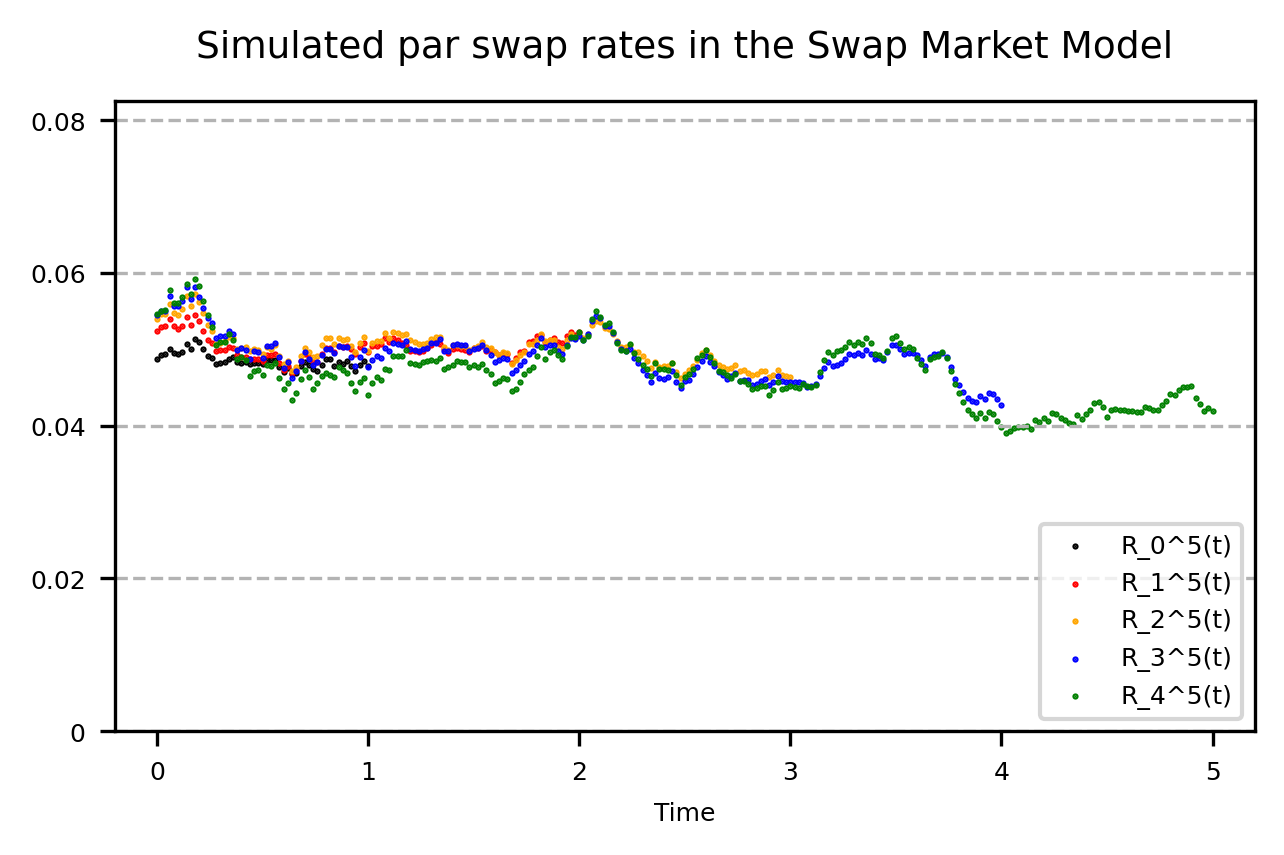

In [1]:
import numpy as np
import fixed_income_derivatives_E2024 as fid
from scipy.linalg import sqrtm
# import finance_jls as fin
import matplotlib.pyplot as plt

# # Data construction
# a0, a1, a2, a3 = -0.024, 0, -0.5, 0.05
# alpha = 1
# M = 6
# T = np.array([m*alpha for m in range(0,M)])
# R = fin.nsts(a0,a1,a2,a3,T)

R = np.array([0.03544326, 0.04117089, 0.04464488, 0.04675195, 0.04802996])
sigma_swaption = np.array([0.072,0.084,0.102,0.119,0.141])
rho_swap = np.array([[1,0.95,0.9,0.85,0.8],[0.95,1,0.95,0.9,0.85],[0.9,0.95,1,0.95,0.9],[0.85,0.9,0.95,1,0.95],[0.8,0.85,0.9,0.95,1]])
print(rho_swap)

# Problem 1
M, alpha = 6, 1
T = np.array([m*alpha for m in range(0,M)])
p = np.ones(M)
alpha = np.zeros(M)
sigma_lmm = np.ones(M)
for i in range(1,M):
    p[i] = np.exp(-R[i-1]*T[i])
    alpha[i] = T[i]-T[i-1]
R_swap = np.zeros(M-1)
for i in range(0,M-1):
    R_swap[i], af = fid.swap_rate_from_zcb_prices(0,T[i],T[-1],"annual",T,p)

M_simul = 250
t_simul = np.array([i*T[-1]/M_simul for i in range(0,M_simul+1)])
R_simul = fid.simul_smm(R_swap,T,sigma_swaption,rho_swap,M_simul)

fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Simulated par swap rates in the Swap Market Model", fontsize = 9)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = np.array([0,1,2,3,4,5])
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Time",fontsize = 6)
ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels([0,0.02,0.04,0.06,0.08],fontsize = 6)
ax.set_ylim([0,0.0825])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(t_simul, R_simul[0,:], s = 1, color = 'black', marker = ".",label="R_0^5(t)")
p2 = ax.scatter(t_simul, R_simul[1,:], s = 1, color = 'red', marker = ".",label="R_1^5(t)")
p3 = ax.scatter(t_simul, R_simul[2,:], s = 1, color = 'orange', marker = ".",label="R_2^5(t)")
p4 = ax.scatter(t_simul, R_simul[3,:], s = 1, color = 'blue', marker = ".",label="R_3^5(t)")
p5 = ax.scatter(t_simul, R_simul[4,:], s = 1, color = 'green', marker = ".",label="R_4^5(t)")
plots = [p1,p2,p3,p4,p5]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
plt.show()